In [32]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Unsupervised Learning
from sklearn.cluster import KMeans

# Modeling and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA





In [12]:
import pandas as pd

# Load the dataset
file_path = 'telco.csv'
telco_data = pd.read_csv(file_path)

telco_data.shape

# Check for missing values
missing_summary = telco_data.isnull().sum()
print("Missing Values per Column:\n", missing_summary)

# Check percentage of missing values
missing_percentage = (telco_data.isnull().sum() / len(telco_data)) * 100
print("\nPercentage of Missing Values:\n", missing_percentage)


Missing Values per Column:
 Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Intern

In [13]:
# Handle Missing Values for 'Offer'
telco_data['Offer'] = telco_data['Offer'].fillna('No Offer')

# Verify missing values for 'Offer'
print("Missing Values in 'Offer' After Handling:", telco_data['Offer'].isnull().sum())


Missing Values in 'Offer' After Handling: 0


In [14]:
# Handle Missing Values for 'Internet Type'
most_frequent_internet_type = telco_data['Internet Type'].mode()[0]
telco_data['Internet Type'] = telco_data['Internet Type'].fillna(most_frequent_internet_type)

# Verify missing values for 'Internet Type'
print("Missing Values in 'Internet Type' After Handling:", telco_data['Internet Type'].isnull().sum())


Missing Values in 'Internet Type' After Handling: 0


In [15]:
print(telco_data.describe())

               Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude     Population  Number of Referrals  Tenure in Months  \
count  7043.000000    7043.000000          7043.000000       7043.000000   
mean   -119.756684   22139.603294             1.951867         32.386767   
std       2.154425   21152.392837             3.001199         24.542061   
min    -124.301372      11.000000             0.000000  

In [16]:
# Check for missing values
missing_summary = telco_data.isnull().sum()
print("Missing Values per Column:\n", missing_summary)


Missing Values per Column:
 Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Intern

In [17]:
# Handle Missing Values for 'Churn Category'
telco_data['Churn Category'] = telco_data['Churn Category'].fillna('Not Applicable')

# Verify missing values for 'Churn Category'
print("Missing Values in 'Churn Category' After Handling:", telco_data['Churn Category'].isnull().sum())

# Handle Missing Values for 'Churn Reason'
telco_data['Churn Reason'] = telco_data['Churn Reason'].fillna('Not Applicable')

# Verify missing values for 'Churn Reason'
print("Missing Values in 'Churn Reason' After Handling:", telco_data['Churn Reason'].isnull().sum())


# Check for missing values
missing_summary = telco_data.isnull().sum()
print("Missing Values per Column:\n", missing_summary)


Missing Values in 'Churn Category' After Handling: 0
Missing Values in 'Churn Reason' After Handling: 0
Missing Values per Column:
 Customer ID                          0
Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Number of Dependents                 0
Country                              0
State                                0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Population                           0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple L

In [18]:
#Visualization of the target variable
print(telco_data['Churn Label'].value_counts()) 


Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


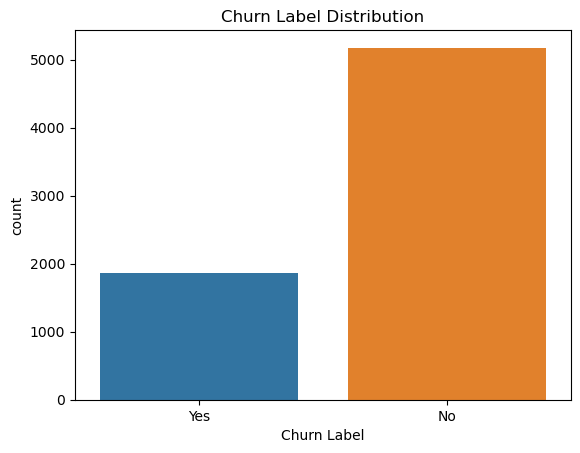

In [22]:
sns.countplot(data=telco_data, x='Churn Label')
plt.title("Churn Label Distribution")
plt.show()


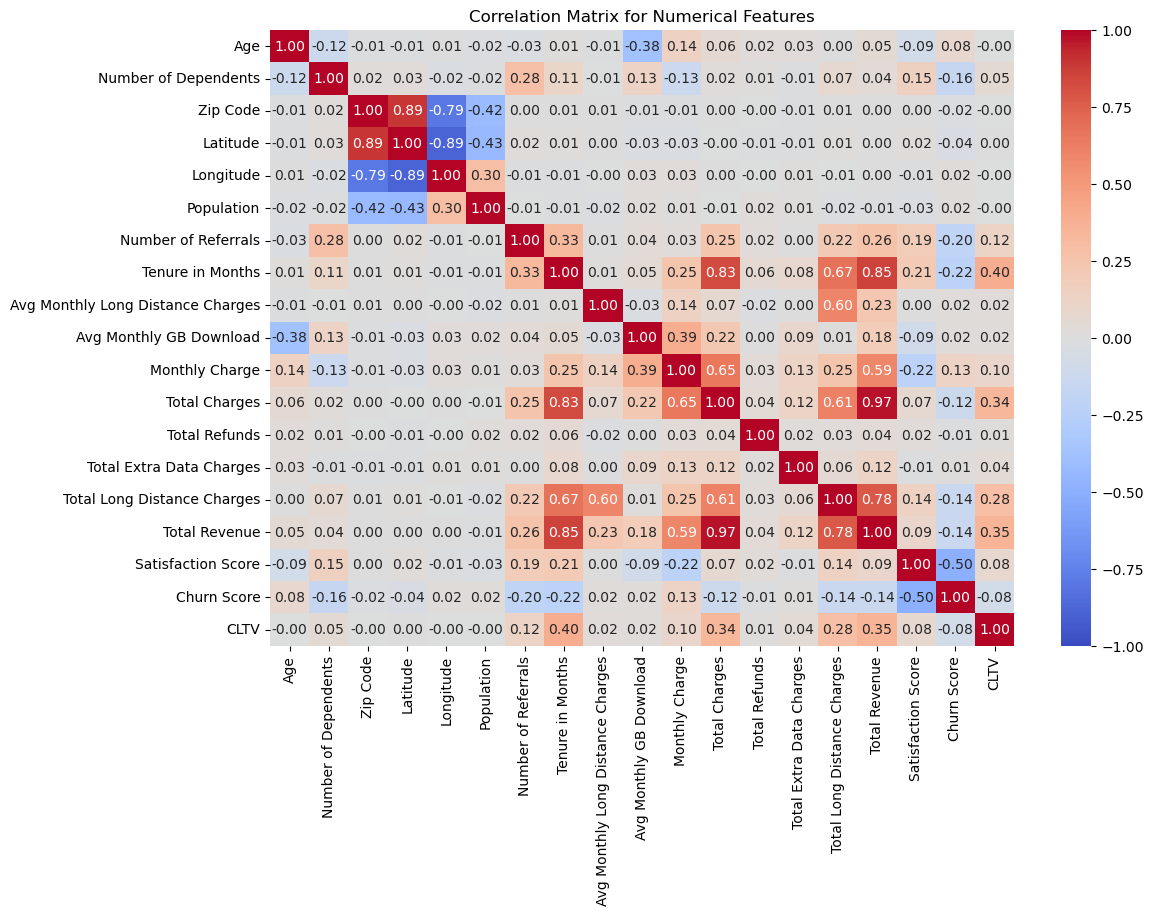

In [23]:
# Correlation Analysis for Numerical Features
numerical_columns = telco_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = telco_data[numerical_columns].corr()

# Heatmap for Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Numerical Features")
plt.show()


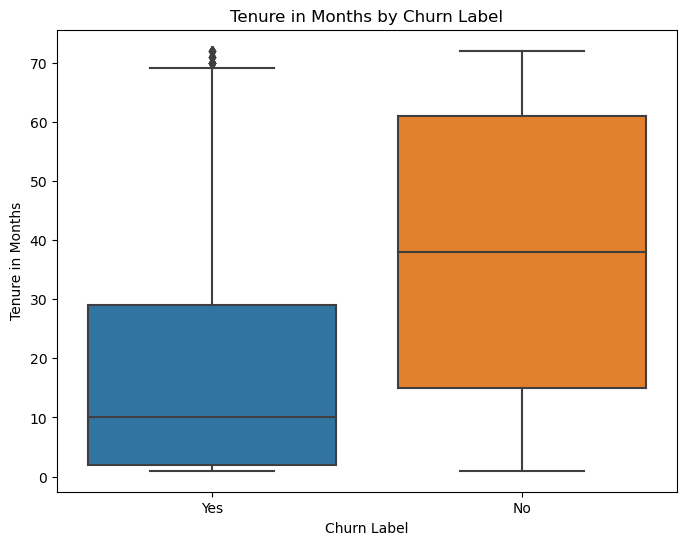

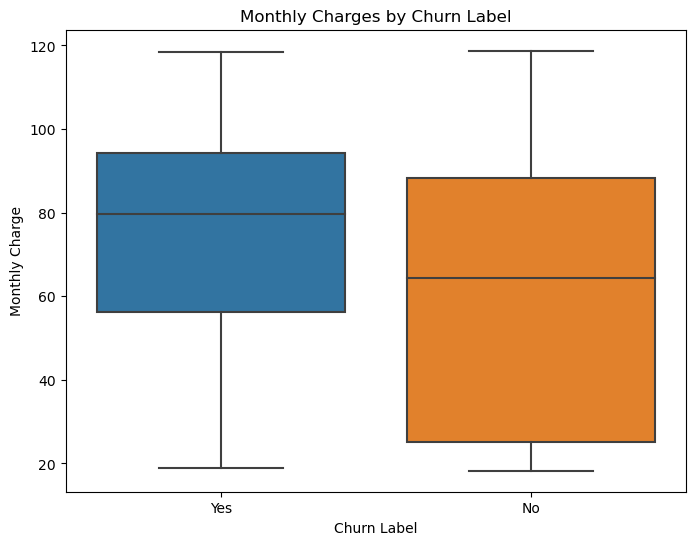

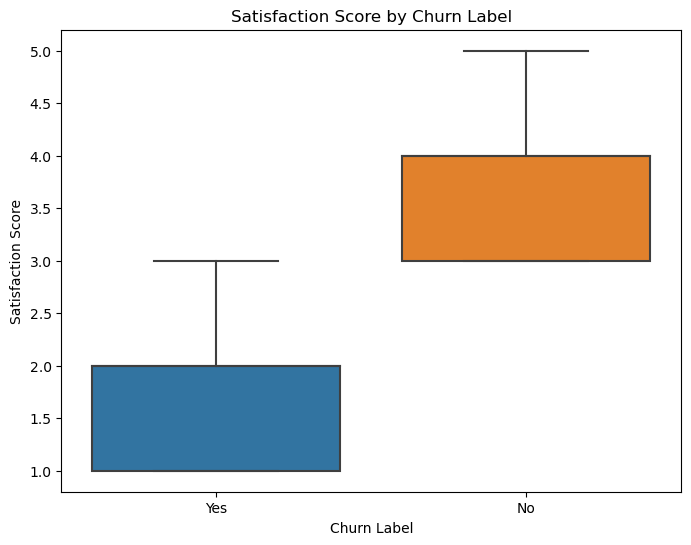

In [24]:
# Boxplot: Tenure in Months vs Churn Label
plt.figure(figsize=(8, 6))
sns.boxplot(data=telco_data, x='Churn Label', y='Tenure in Months')
plt.title("Tenure in Months by Churn Label")
plt.xlabel("Churn Label")
plt.ylabel("Tenure in Months")
plt.show()

# Boxplot: Monthly Charges vs Churn Label
plt.figure(figsize=(8, 6))
sns.boxplot(data=telco_data, x='Churn Label', y='Monthly Charge')
plt.title("Monthly Charges by Churn Label")
plt.xlabel("Churn Label")
plt.ylabel("Monthly Charge")
plt.show()

# Boxplot: Satisfaction Score vs Churn Label
plt.figure(figsize=(8, 6))
sns.boxplot(data=telco_data, x='Churn Label', y='Satisfaction Score')
plt.title("Satisfaction Score by Churn Label")
plt.xlabel("Churn Label")
plt.ylabel("Satisfaction Score")
plt.show()


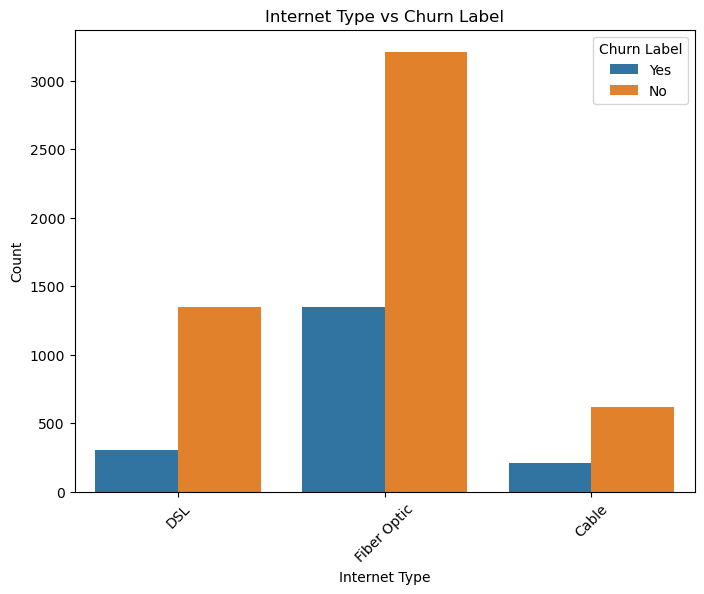

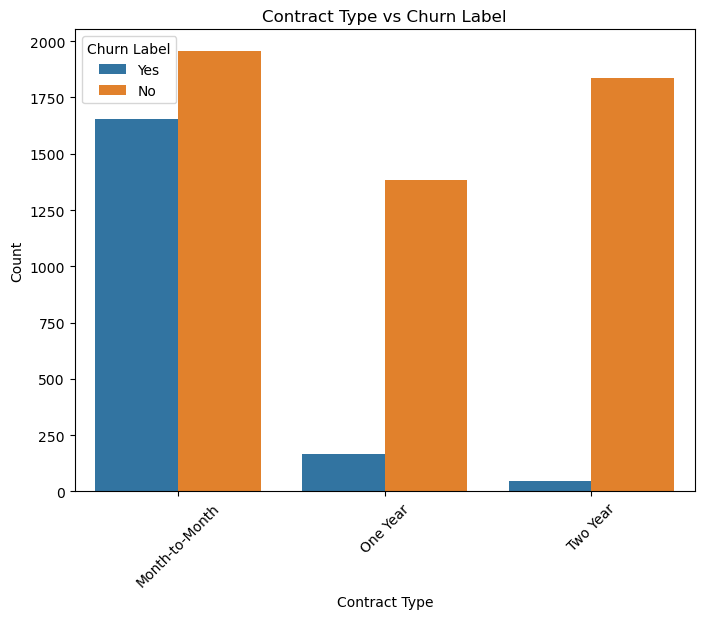

In [25]:
# Countplot: Internet Type vs Churn Label
plt.figure(figsize=(8, 6))
sns.countplot(data=telco_data, x='Internet Type', hue='Churn Label')
plt.title("Internet Type vs Churn Label")
plt.xticks(rotation=45)
plt.xlabel("Internet Type")
plt.ylabel("Count")
plt.show()

# Countplot: Contract Type vs Churn Label
plt.figure(figsize=(8, 6))
sns.countplot(data=telco_data, x='Contract', hue='Churn Label')
plt.title("Contract Type vs Churn Label")
plt.xticks(rotation=45)
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()


In [26]:
from scipy.stats import chi2_contingency

# Chi-squared test for Internet Type and Churn Label
internet_type_churn = pd.crosstab(telco_data['Internet Type'], telco_data['Churn Label'])
chi2_stat, p_val, dof, ex = chi2_contingency(internet_type_churn)
print("Chi-squared Test for 'Internet Type' and 'Churn Label':")
print(f"Chi2 Stat: {chi2_stat}, P-value: {p_val}, Degrees of Freedom: {dof}")
if p_val < 0.05:
    print("There is a significant relationship between Internet Type and Churn Label.\n")
else:
    print("No significant relationship between Internet Type and Churn Label.\n")

# Chi-squared test for Contract Type and Churn Label
contract_churn = pd.crosstab(telco_data['Contract'], telco_data['Churn Label'])
chi2_stat, p_val, dof, ex = chi2_contingency(contract_churn)
print("Chi-squared Test for 'Contract' and 'Churn Label':")
print(f"Chi2 Stat: {chi2_stat}, P-value: {p_val}, Degrees of Freedom: {dof}")
if p_val < 0.05:
    print("There is a significant relationship between Contract Type and Churn Label.\n")
else:
    print("No significant relationship between Contract Type and Churn Label.\n")


Chi-squared Test for 'Internet Type' and 'Churn Label':
Chi2 Stat: 75.54950795499505, P-value: 3.932174589065353e-17, Degrees of Freedom: 2
There is a significant relationship between Internet Type and Churn Label.

Chi-squared Test for 'Contract' and 'Churn Label':
Chi2 Stat: 1445.2932428377585, P-value: 0.0, Degrees of Freedom: 2
There is a significant relationship between Contract Type and Churn Label.



In [36]:

# # Select relevant features
# selected_features = ['Tenure in Months', 'Monthly Charge', 'Satisfaction Score', 
#                      'Contract', 'Internet Type']

# # Separate categorical and numerical features
# categorical_features = ['Contract', 'Internet Type']
# numerical_features = ['Tenure in Months', 'Monthly Charge', 'Satisfaction Score']

# # One-Hot Encoding for categorical features
# preprocessor = ColumnTransformer(transformers=[
#     ('num', StandardScaler(), numerical_features),
#     ('cat', OneHotEncoder(drop='first'), categorical_features)
# ])

# # Apply transformations
# processed_features = preprocessor.fit_transform(telco_data)

# Select relevant features
selected_features = ['Tenure in Months', 'Monthly Charge', 'Satisfaction Score', 
                     'Contract', 'Internet Type']

# Separate categorical and numerical features
categorical_features = ['Contract', 'Internet Type']
numerical_features = ['Tenure in Months', 'Monthly Charge', 'Satisfaction Score']

# Preprocessor: Scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Apply transformations
processed_features = preprocessor.fit_transform(telco_data)

# Check the number of features after preprocessing
n_features = processed_features.shape[1]  # Total features after preprocessing
n_components_value = min(7, n_features)  # Dynamically determine n_components
n_features, n_components_value


(7, 7)

In [37]:
print(f"Number of Features: {processed_features.shape[1]}")


Number of Features: 7


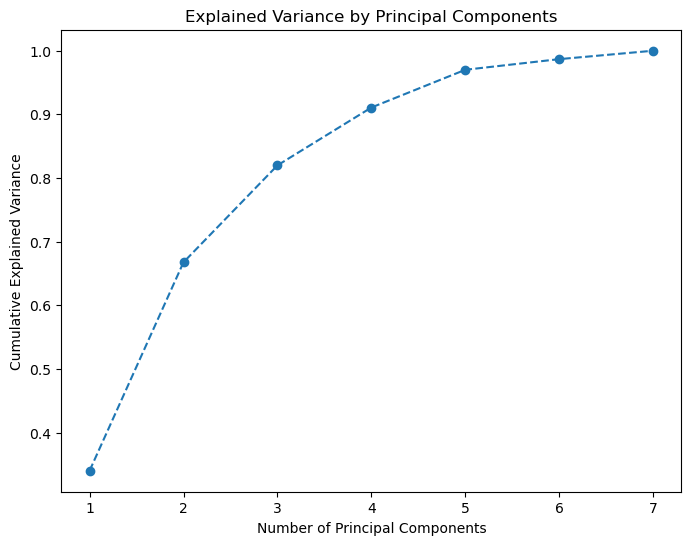

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Dynamically determine the number of components
n_features = processed_features.shape[1]  # Total features after preprocessing
n_components = min(7, n_features)  # Ensure components are within valid range

# Perform PCA
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(processed_features)

# Explained Variance Ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


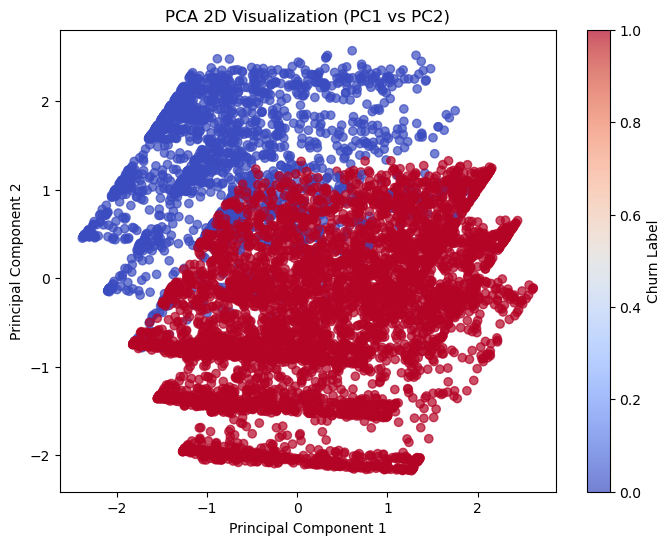

In [39]:
import matplotlib.pyplot as plt

# Scatterplot of the first 2 PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=telco_data['Churn Label'].factorize()[0], cmap='coolwarm', alpha=0.7)
plt.title("PCA 2D Visualization (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Churn Label")
plt.show()


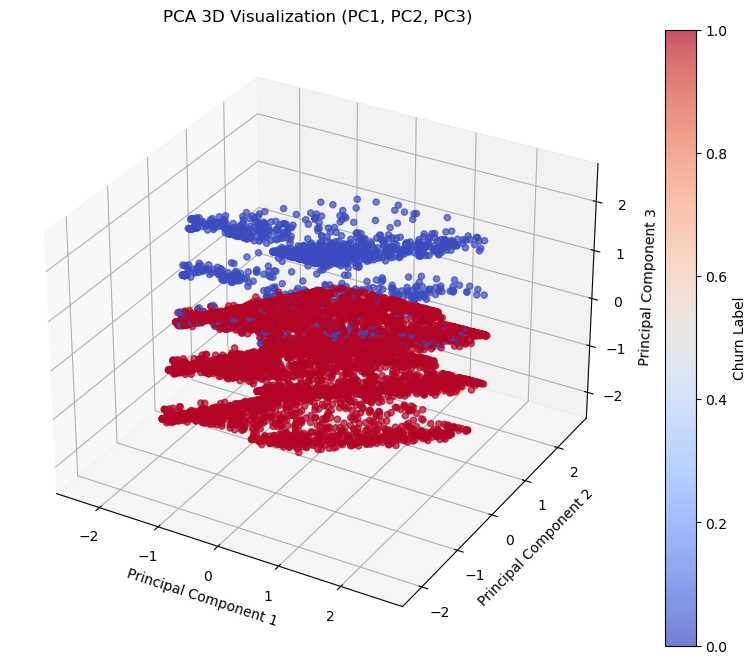

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# Scatterplot of the first 3 PCA components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
    c=telco_data['Churn Label'].factorize()[0], cmap='coolwarm', alpha=0.7
)
ax.set_title("PCA 3D Visualization (PC1, PC2, PC3)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.colorbar(scatter, label="Churn Label")
plt.show()


In [44]:
pip install umap-learn


Note: you may need to restart the kernel to use updated packages.


/Users/ramprakashbollam/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


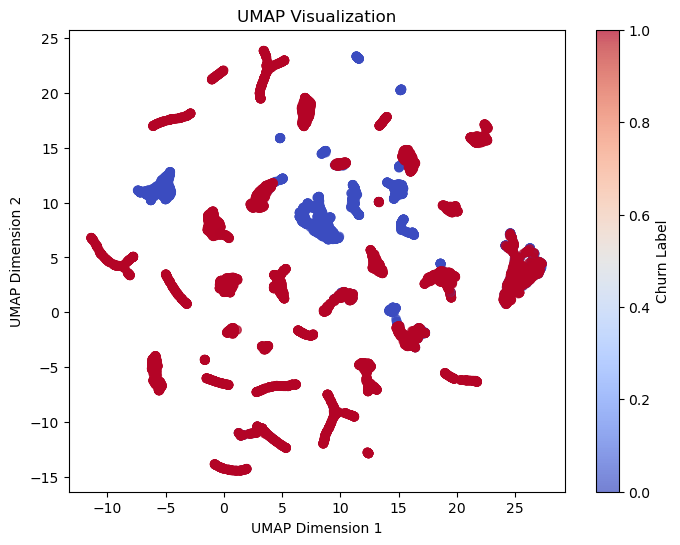

In [45]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Perform UMAP
umap_reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
umap_result = umap_reducer.fit_transform(processed_features)

# Visualize UMAP results
plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=telco_data['Churn Label'].factorize()[0], cmap='coolwarm', alpha=0.7)
plt.title("UMAP Visualization")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(label="Churn Label")
plt.show()


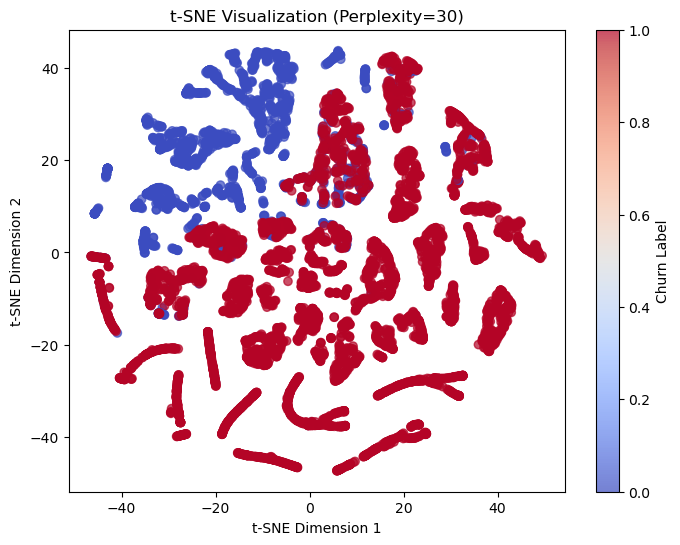

In [46]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
tsne_result = tsne.fit_transform(processed_features)

# Visualize t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=telco_data['Churn Label'].factorize()[0], cmap='coolwarm', alpha=0.7)
plt.title("t-SNE Visualization (Perplexity=30)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Churn Label")
plt.show()



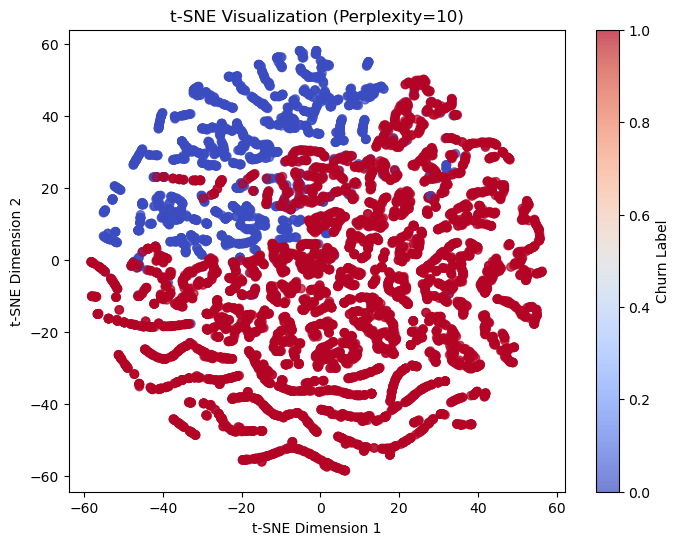

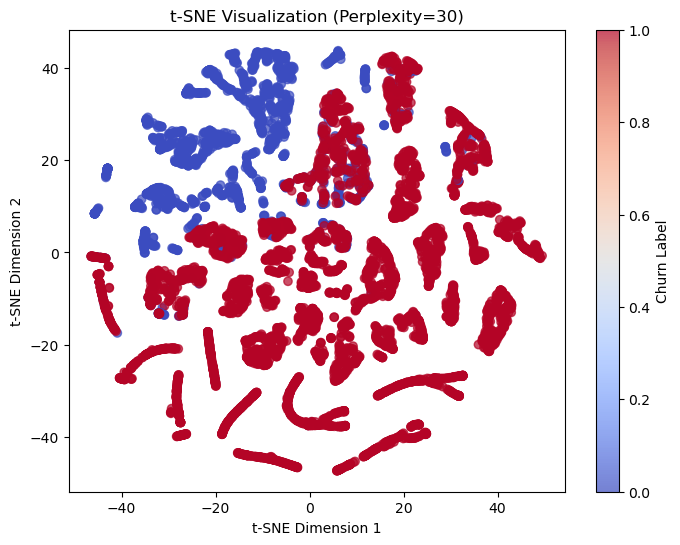

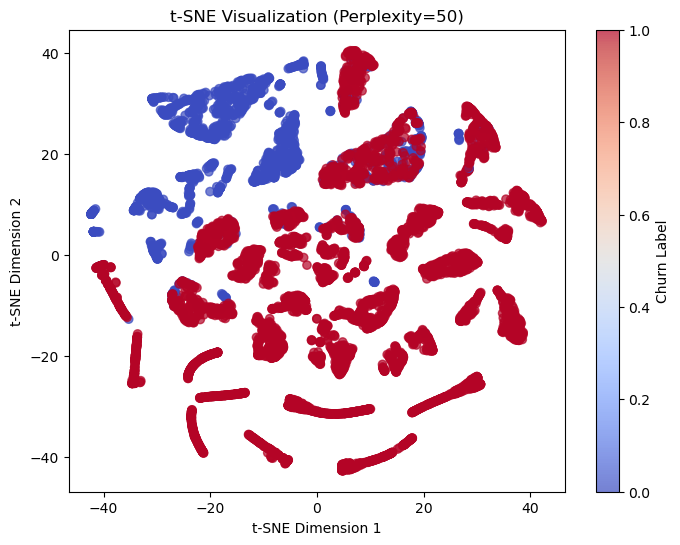

In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Test different perplexity values
for perplexity in [10, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=500, random_state=42)
    tsne_result = tsne.fit_transform(processed_features)

    # Visualize t-SNE results
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=telco_data['Churn Label'].factorize()[0], cmap='coolwarm', alpha=0.7)
    plt.title(f"t-SNE Visualization (Perplexity={perplexity})")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.colorbar(label="Churn Label")
    plt.show()


/Users/ramprakashbollam/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


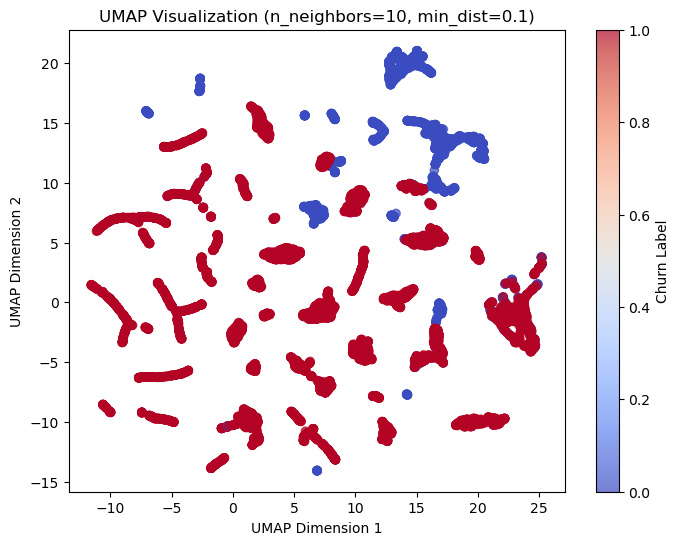

/Users/ramprakashbollam/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


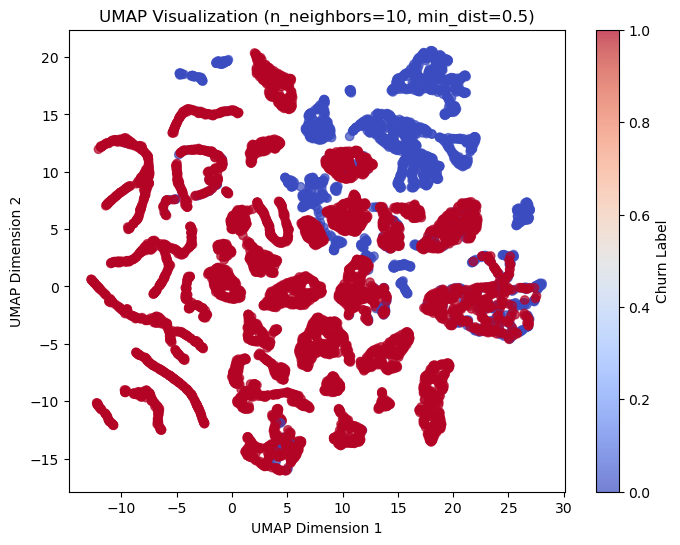

/Users/ramprakashbollam/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


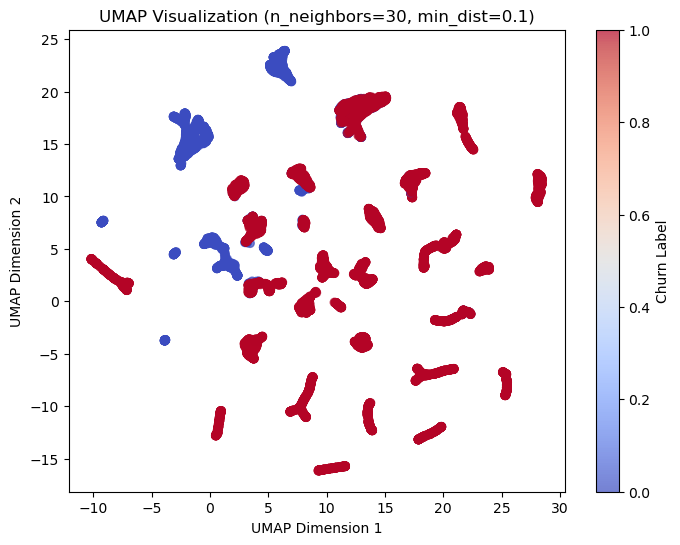

/Users/ramprakashbollam/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


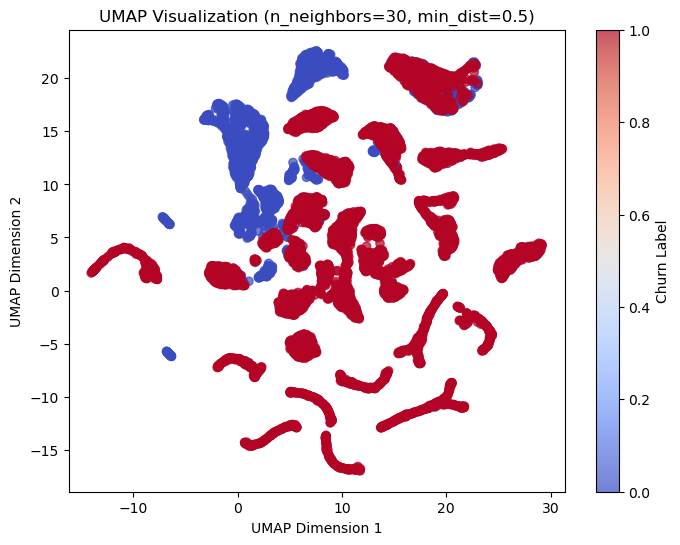

/Users/ramprakashbollam/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


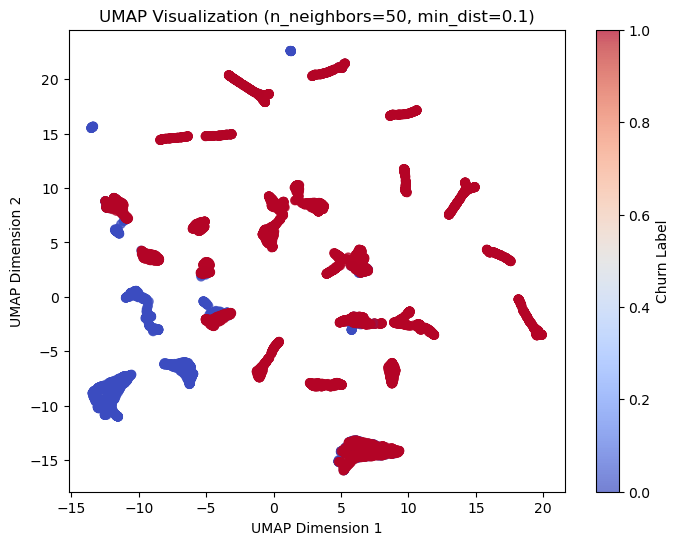

/Users/ramprakashbollam/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


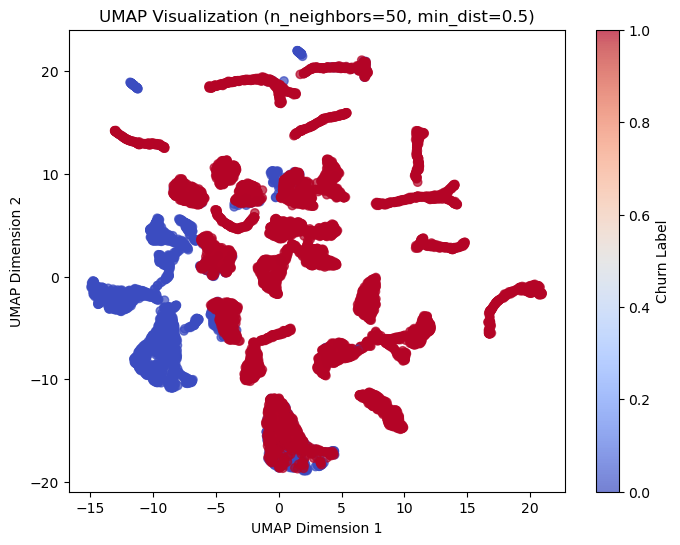

In [50]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Test different combinations of parameters
for n_neighbors in [10, 30, 50]:
    for min_dist in [0.1, 0.5]:
        umap_reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
        umap_result = umap_reducer.fit_transform(processed_features)

        # Visualize UMAP results
        plt.figure(figsize=(8, 6))
        plt.scatter(umap_result[:, 0], umap_result[:, 1], c=telco_data['Churn Label'].factorize()[0], cmap='coolwarm', alpha=0.7)
        plt.title(f"UMAP Visualization (n_neighbors={n_neighbors}, min_dist={min_dist})")
        plt.xlabel("UMAP Dimension 1")
        plt.ylabel("UMAP Dimension 2")
        plt.colorbar(label="Churn Label")
        plt.show()


In [51]:
import numpy as np
import pandas as pd

# Create interaction terms
telco_data['Tenure_Charge'] = telco_data['Tenure in Months'] * telco_data['Monthly Charge']
telco_data['Satisfaction_Contract'] = telco_data['Satisfaction Score'] * telco_data['Contract'].factorize()[0]

# Transform numerical features
telco_data['Log_Monthly_Charge'] = np.log1p(telco_data['Monthly Charge'])
telco_data['Square_Satisfaction'] = telco_data['Satisfaction Score'] ** 2

# Create new features
telco_data['Avg_Charge_Per_Month'] = telco_data['Total Charges'] / np.where(telco_data['Tenure in Months'] == 0, 1, telco_data['Tenure in Months'])
telco_data['High_Spender'] = (telco_data['Monthly Charge'] > telco_data['Monthly Charge'].median()).astype(int)

# Preprocess with new features included
categorical_features = ['Contract', 'Internet Type']
numerical_features = ['Tenure in Months', 'Monthly Charge', 'Satisfaction Score',
                      'Tenure_Charge', 'Satisfaction_Contract', 'Log_Monthly_Charge',
                      'Square_Satisfaction', 'Avg_Charge_Per_Month']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

processed_features = preprocessor.fit_transform(telco_data)


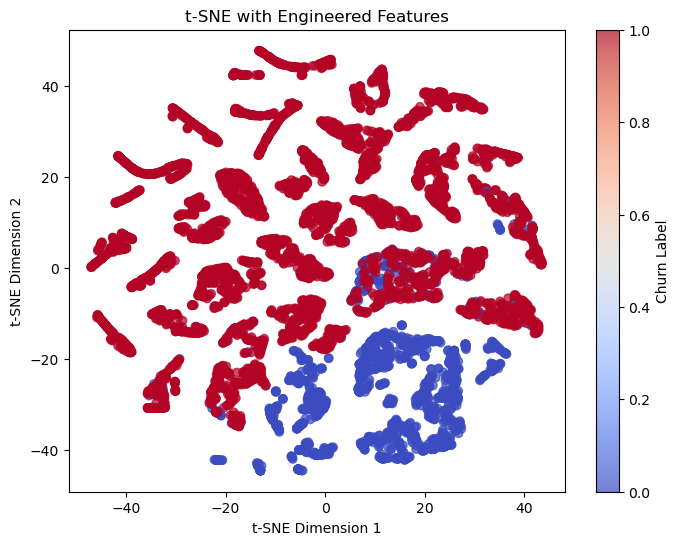

In [52]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
tsne_result = tsne.fit_transform(processed_features)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=telco_data['Churn Label'].factorize()[0], cmap='coolwarm', alpha=0.7)
plt.title("t-SNE with Engineered Features")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Churn Label")
plt.show()


/Users/ramprakashbollam/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


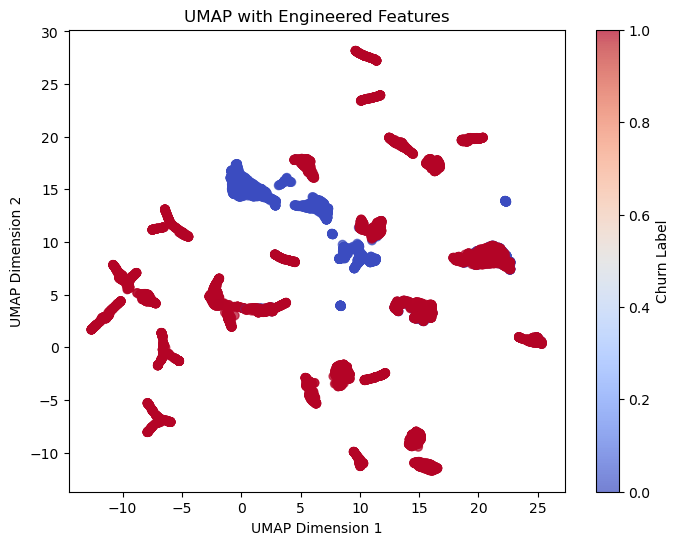

In [53]:
umap_reducer = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.1, random_state=42)
umap_result = umap_reducer.fit_transform(processed_features)

plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=telco_data['Churn Label'].factorize()[0], cmap='coolwarm', alpha=0.7)
plt.title("UMAP with Engineered Features")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(label="Churn Label")
plt.show()


In [77]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Encode target labels ('Yes' and 'No') to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # "No" -> 0, "Yes" -> 1

# Initialize Stratified K-Fold
k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Placeholder to store results
accuracy = []
precision = []
recall = []
f1 = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(processed_features, y_encoded):
    # Split data into train and test sets
    X_train, X_test = processed_features[train_index], processed_features[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate metrics
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

# Print Results
print("Random Forest Classifier Results:")
print("K-Fold Cross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy):.4f}")
print(f"Precision: {np.mean(precision):.4f}")
print(f"Recall: {np.mean(recall):.4f}")
print(f"F1-Score: {np.mean(f1):.4f}")


Random Forest Classifier Results:
K-Fold Cross-Validation Results:
Accuracy: 0.9459
Precision: 0.9331
Recall: 0.8577
F1-Score: 0.8937


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Stratified K-Fold
k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with Stratified K-Fold
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=skf, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(processed_features, y_encoded)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Evaluate with Stratified K-Fold
accuracy = []
precision = []
recall = []
f1 = []

for train_index, test_index in skf.split(processed_features, y_encoded):
    X_train, X_test = processed_features[train_index], processed_features[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Train the best model on each fold
    best_rf_model.fit(X_train, y_train)
    y_pred = best_rf_model.predict(X_test)
    
    # Evaluate metrics
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

# Print Results
print("Tuned Random Forest Classifier Results:")
print("Stratified K-Fold Results with Tuned Model:")
print(f"Accuracy: {np.mean(accuracy):.4f}")
print(f"Precision: {np.mean(precision):.4f}")
print(f"Recall: {np.mean(recall):.4f}")
print(f"F1-Score: {np.mean(f1):.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Random Forest Classifier Results:
Stratified K-Fold Results with Tuned Model:
Accuracy: 0.9514
Precision: 0.9631
Recall: 0.8497
F1-Score: 0.9027


In [59]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Placeholder to store metrics
accuracy_lr = []
precision_lr = []
recall_lr = []
f1_lr = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(processed_features, y_encoded):
    X_train, X_test = processed_features[train_index], processed_features[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Train the Logistic Regression model
    log_reg.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = log_reg.predict(X_test)
    
    # Evaluate metrics
    accuracy_lr.append(accuracy_score(y_test, y_pred))
    precision_lr.append(precision_score(y_test, y_pred))
    recall_lr.append(recall_score(y_test, y_pred))
    f1_lr.append(f1_score(y_test, y_pred))

# Print Results for Logistic Regression
print("Logistic Regression Results:")
print(f"Accuracy: {np.mean(accuracy_lr):.4f}")
print(f"Precision: {np.mean(precision_lr):.4f}")
print(f"Recall: {np.mean(recall_lr):.4f}")
print(f"F1-Score: {np.mean(f1_lr):.4f}")


Logistic Regression Results:
Accuracy: 0.9490
Precision: 0.9587
Recall: 0.8443
F1-Score: 0.8978


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Regularization type (we use 'l2' because others depend on solvers like 'saga')
    'solver': ['lbfgs', 'liblinear']  # Optimization algorithms
}

# Initialize Stratified K-Fold
k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Perform Grid Search with Stratified K-Fold
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=skf, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(processed_features, y_encoded)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_log_reg = grid_search.best_estimator_

# Evaluate with Stratified K-Fold
accuracy_lr = []
precision_lr = []
recall_lr = []
f1_lr = []

for train_index, test_index in skf.split(processed_features, y_encoded):
    X_train, X_test = processed_features[train_index], processed_features[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Train the best model on each fold
    best_log_reg.fit(X_train, y_train)
    y_pred = best_log_reg.predict(X_test)
    
    # Evaluate metrics
    accuracy_lr.append(accuracy_score(y_test, y_pred))
    precision_lr.append(precision_score(y_test, y_pred))
    recall_lr.append(recall_score(y_test, y_pred))
    f1_lr.append(f1_score(y_test, y_pred))

# Print Results
print("Tuned Logistic Regression Results:")
print(f"Accuracy: {np.mean(accuracy_lr):.4f}")
print(f"Precision: {np.mean(precision_lr):.4f}")
print(f"Recall: {np.mean(recall_lr):.4f}")
print(f"F1-Score: {np.mean(f1_lr):.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Results:
Accuracy: 0.9496
Precision: 0.9616
Recall: 0.8438
F1-Score: 0.8988


In [62]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/28/3c/ddf5d9eb742cdb7fbcd5c854bce07471bad01194ac37de91db64fbef0c58/xgboost-2.1.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [76]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Initialize XGBoost Classifier with evaluation metric
xgb_model = XGBClassifier(random_state=42, eval_metric="logloss", early_stopping_rounds=10)

# Placeholder to store metrics
accuracy_xgb = []
precision_xgb = []
recall_xgb = []
f1_xgb = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(processed_features, y_encoded):
    X_train, X_test = processed_features[train_index], processed_features[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Split train set into training and validation sets for early stopping
    X_train_split = X_train[: int(0.8 * len(X_train))]
    X_val_split = X_train[int(0.8 * len(X_train)) :]
    y_train_split = y_train[: int(0.8 * len(y_train))]
    y_val_split = y_train[int(0.8 * len(y_train)) :]

    # Train the XGBoost model with early stopping
    xgb_model.fit(
        X_train_split,
        y_train_split,
        eval_set=[(X_val_split, y_val_split)],
        verbose=False,
    )
    
    # Predict on the test set
    y_pred = xgb_model.predict(X_test)
    
    # Evaluate metrics
    accuracy_xgb.append(accuracy_score(y_test, y_pred))
    precision_xgb.append(precision_score(y_test, y_pred))
    recall_xgb.append(recall_score(y_test, y_pred))
    f1_xgb.append(f1_score(y_test, y_pred))

# Print Results for XGBoost
print("XGBoost Results with Early Stopping:")
print(f"Accuracy: {np.mean(accuracy_xgb):.4f}")
print(f"Precision: {np.mean(precision_xgb):.4f}")
print(f"Recall: {np.mean(recall_xgb):.4f}")
print(f"F1-Score: {np.mean(f1_xgb):.4f}")


XGBoost Results with Early Stopping:
Accuracy: 0.9459
Precision: 0.9180
Recall: 0.8743
F1-Score: 0.8955


In [75]:

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7],          # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.8, 1.0],         # Fraction of samples for fitting trees
    'colsample_bytree': [0.8, 1.0],  # Fraction of features for each tree
    'gamma': [0, 1, 5],              # Minimum loss reduction for split
    'reg_alpha': [0, 0.1, 1.0],      # L1 regularization term
    'reg_lambda': [1.0, 2.0]         # L2 regularization term
}

# Initialize Stratified K-Fold
k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42, eval_metric="logloss")

# Perform Grid Search with Stratified K-Fold
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=skf, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(processed_features, y_encoded)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print("Best Parameters Found:")
print(best_params)

# Evaluate the tuned model with Stratified K-Fold
accuracy_xgb = []
precision_xgb = []
recall_xgb = []
f1_xgb = []

for train_index, test_index in skf.split(processed_features, y_encoded):
    X_train, X_test = processed_features[train_index], processed_features[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Train the best model on each fold
    best_xgb_model.fit(X_train, y_train)
    y_pred = best_xgb_model.predict(X_test)

    # Evaluate metrics
    accuracy_xgb.append(accuracy_score(y_test, y_pred))
    precision_xgb.append(precision_score(y_test, y_pred))
    recall_xgb.append(recall_score(y_test, y_pred))
    f1_xgb.append(f1_score(y_test, y_pred))

# Print Results for the Tuned XGBoost Model
print("XGBoost Results After Hyperparameter Tuning:")
print(f"Accuracy: {np.mean(accuracy_xgb):.4f}")
print(f"Precision: {np.mean(precision_xgb):.4f}")
print(f"Recall: {np.mean(recall_xgb):.4f}")
print(f"F1-Score: {np.mean(f1_xgb):.4f}")


Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Best Parameters Found:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 1.0}
XGBoost Results After Hyperparameter Tuning:
Accuracy: 0.9509
Precision: 0.9536
Recall: 0.8566
F1-Score: 0.9024
